# Hands-on MNIST using Machine Learning and Deep Learning

# 1. Data

## Data Exploration

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
print('Unique Labels:')
y.value_counts()

Unique Labels:


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [6]:
print('Label-Balance (in %):')
y.value_counts()/len(y)*100

Label-Balance (in %):


1    11.252857
7    10.418571
3    10.201429
2     9.985714
9     9.940000
0     9.861429
6     9.822857
8     9.750000
4     9.748571
5     9.018571
Name: class, dtype: float64

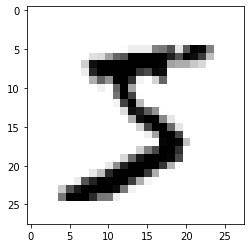

Label: 5


In [7]:
digit_index = 0

digit = X.values[digit_index].reshape(28,28)
plt.imshow(digit, cmap='binary')
plt.show()

print('Label:', y[digit_index])

## Data Preprocessing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
def normalize(data):
    return data/255 # Alternatively, you can use sklearn's MinMax Scaler. For other feature scaling tasks, you would normally use StandardScaler

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

# 2. Machine Learning

In [10]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Model Selection using Cross-Validation

In [11]:
# Just a few Classifier, add more if you want!
estimators = [
    DecisionTreeClassifier(), 
    RandomForestClassifier()
]

In [12]:
CV = 5 # Fold
SCORING = 'f1_macro' # Validation Metric (others: accuracy, precision, recall, ...)

scores = [cross_val_score(estimator=estimator, X=X_train_normalized, y=y_train, cv=CV, scoring=SCORING).mean() for estimator in tqdm(estimators) ]
best_estimator = estimators[scores.index(max(scores))]
best_score = max(scores)

print(best_estimator, best_score)

100%|██████████| 2/2 [03:26<00:00, 103.22s/it]

RandomForestClassifier() 0.9683769618434408


## Hyperparameter-Tuning using GridSearchCV

In [13]:
PARAM_GRID = ''

# Example Parameter Grid for a Random Forest Classifier and a Decicion Tree
if type(best_estimator) == type(RandomForestClassifier()):
    PARAM_GRID = [
        {'n_estimators':[3,10,30,100], 'max_features': [2,4]},
        {'bootstrap':[False], 'n_estimators':[3,10,30,100], 'max_features': [2,4]}
    ]

elif type(best_estimator) == type(DecisionTreeClassifier()): 
    PARAM_GRID = [
        {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}
    ]

estimator_cv = GridSearchCV(estimator=best_estimator, param_grid=PARAM_GRID, scoring=SCORING, cv=CV)
search_result = estimator_cv.fit(X=X_train_normalized, y=y_train)

print(search_result.best_estimator_, search_result.best_score_)

RandomForestClassifier(bootstrap=False, max_features=4) 0.9656881346247074


## Validate final Model based on Test-Set

In [14]:
final_ML_model = search_result.best_estimator_
final_predictions = final_ML_model.predict(X_test_normalized)

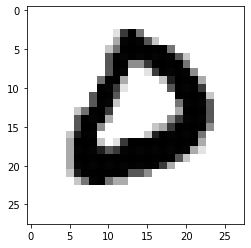

Label: 0
Prediction: 0


In [15]:
digit_index = 5

digit = X_test_normalized.values[digit_index].reshape(28,28)
plt.imshow(digit, cmap='binary')
plt.show()

print('Label:', y_test.values[digit_index])
print('Prediction:', final_predictions[digit_index])

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [17]:
accuracy_score(final_predictions, y_test)

0.9642857142857143

In [18]:
classification_report(final_predictions, y_test)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       688\n           1       0.99      0.98      0.98       808\n           2       0.97      0.95      0.96       693\n           3       0.94      0.95      0.94       755\n           4       0.97      0.97      0.97       613\n           5       0.95      0.97      0.96       643\n           6       0.98      0.97      0.98       688\n           7       0.97      0.97      0.97       724\n           8       0.94      0.96      0.95       679\n           9       0.94      0.96      0.95       709\n\n    accuracy                           0.96      7000\n   macro avg       0.96      0.96      0.96      7000\nweighted avg       0.96      0.96      0.96      7000\n'

Text(0.5, 1.0, 'Confusion Matrix')

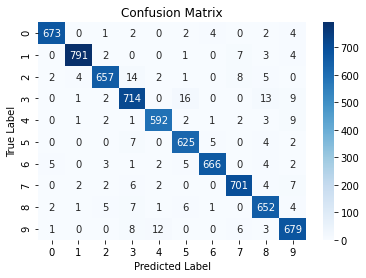

In [19]:
matrix = confusion_matrix(final_predictions, y_test)
ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [20]:
'''
NOTE: Over- and Underfitting
Score of cross validation on train is good but not on test set: Model probably overfits the data 
Solution: Try with a less complex model to prevent overfitting

Score of cross validation on train AND test set is bad: Model probably underfits/generalizes the data OR data quality is bad
Solution: Try with a more complex model AND/OR collect more data/features
'''

'\nNOTE: Over- and Underfitting\nScore of cross validation on train is good but not on test set: Model probably overfits the data \nSolution: Try with a less complex model to prevent overfitting\n\nScore of cross validation on train AND test set is bad: Model probably underfits/generalizes the data OR data quality is bad\nSolution: Try with a more complex model AND/OR collect more data/features\n'

## Save Model

In [21]:
import joblib
from datetime import datetime

In [22]:
now = str(datetime.now().strftime("%Y-%m-%d_%H:%M"))
filename = 'ML_model-{now}.pkl'.format(**locals())

joblib.dump(final_ML_model, 'models/machine_learning/'+filename)

['models/machine_learning/ML_model-2021-08-05_10:28.pkl']

# 3. Neural Networks (Deep Learning)

## Neural Network with Fully-Connected/Dense Layers

In [23]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import tensorflow as tf

In [24]:
INPUT_SHAPE = [X_train_normalized.shape[1]] # Number of values per dimension (Number of Features)
OUTPUT_NEURONS = len(y.unique()) # Number of output neurons / label classes

In [63]:
def build_model(n_hidden=4, n_neurons=8):
    model = Sequential()
    model.add(InputLayer(input_shape=INPUT_SHAPE))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(OUTPUT_NEURONS, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Note: Using categorical_crossentropy for (any) classification task (you can also use activation='sigmoid' and loss='binary_crossentropy' for binary classification)
    return model

neural_net = KerasClassifier(build_fn=build_model)

In [64]:
param_grid = {
    'n_hidden': [2,4,6],
    'n_neurons': [50,100,150,200,300,400]
}

N_ITER = 10
EPOCHS = 50
CV = 5

# Note: GridSearchCV would take a long time. Therefore, we use RandomizedSearchCV to tune the Hyperparameters of the Neural Net. However, my experiences show, that 4 hidden layers with 300 neurons do a great job
neural_net_cv = RandomizedSearchCV(estimator=neural_net, param_distributions=param_grid, n_iter=N_ITER, cv=CV)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5) # Monitor Validation Loss and stop Training when Validation Loss starts increasing the <patience> time/number of epochs
neural_result = neural_net_cv.fit(X=X_train_normalized, y=y_train, validation_split=0.1, callbacks=[early_stopping], epochs=EPOCHS, verbose=2)

Epoch 1/50
1418/1418 - 2s - loss: 0.3351 - accuracy: 0.8993 - val_loss: 0.1831 - val_accuracy: 0.9472
Epoch 2/50
1418/1418 - 1s - loss: 0.1524 - accuracy: 0.9539 - val_loss: 0.1548 - val_accuracy: 0.9534
Epoch 3/50
1418/1418 - 1s - loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.1148 - val_accuracy: 0.9665
Epoch 4/50
1418/1418 - 1s - loss: 0.0870 - accuracy: 0.9729 - val_loss: 0.1243 - val_accuracy: 0.9671
Epoch 5/50
1418/1418 - 1s - loss: 0.0710 - accuracy: 0.9778 - val_loss: 0.0994 - val_accuracy: 0.9694
Epoch 6/50
1418/1418 - 1s - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.1007 - val_accuracy: 0.9692
Epoch 7/50
1418/1418 - 1s - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.1067 - val_accuracy: 0.9712
Epoch 8/50
1418/1418 - 1s - loss: 0.0418 - accuracy: 0.9865 - val_loss: 0.1251 - val_accuracy: 0.9679
Epoch 9/50
1418/1418 - 1s - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.1093 - val_accuracy: 0.9690
Epoch 10/50
1418/1418 - 1s - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.1060 - 

In [65]:
final_NN_model = neural_result.best_estimator_
print(neural_result.best_estimator_, neural_result.best_params_, neural_result.best_score_)

<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f98b7d240a0> {'n_hidden': 4, 'n_neurons': 300} 0.9771111130714416


In [66]:
final_predictions = final_NN_model.predict(X_test_normalized)

/Users/andreaspeuker/opt/anaconda3/envs/mnist_toolkit/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


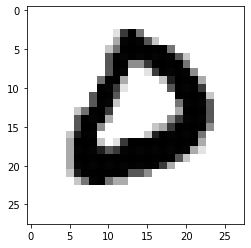

Label: 0
Prediction: 0


In [67]:
digit_index = 5

digit = X_test_normalized.values[digit_index].reshape(28,28)
plt.imshow(digit, cmap='binary')
plt.show()

print('Label:', y_test.values[digit_index])
print('Prediction:', final_predictions[digit_index])

### Validate final Model based on Test-Set

In [68]:
accuracy_score(y_pred=final_predictions, y_true=y_test)

0.9772857142857143

In [69]:
classification_report(y_pred=final_predictions, y_true=y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       683\n           1       0.99      0.99      0.99       800\n           2       0.98      0.96      0.97       674\n           3       0.98      0.97      0.98       760\n           4       0.98      0.99      0.98       611\n           5       0.98      0.96      0.97       658\n           6       0.96      0.99      0.98       677\n           7       0.97      0.99      0.98       724\n           8       0.96      0.97      0.96       693\n           9       0.97      0.97      0.97       720\n\n    accuracy                           0.98      7000\n   macro avg       0.98      0.98      0.98      7000\nweighted avg       0.98      0.98      0.98      7000\n'

In [70]:
confusion_matrix(final_predictions, y_test)

array([[678,   0,   2,   0,   0,   1,   2,   0,   4,   2],
       [  0, 791,   3,   0,   0,   0,   0,   0,   0,   1],
       [  1,   1, 649,   3,   0,   0,   1,   4,   0,   0],
       [  0,   0,   4, 735,   0,   4,   0,   0,   3,   1],
       [  1,   1,   3,   0, 602,   0,   2,   0,   2,   3],
       [  0,   0,   0,   9,   0, 633,   0,   0,   2,   4],
       [  1,   0,   1,   1,   0,  18, 671,   0,   4,   0],
       [  0,   6,   5,   4,   1,   0,   0, 716,   4,   4],
       [  1,   1,   7,   5,   2,   1,   1,   1, 669,   8],
       [  1,   0,   0,   3,   6,   1,   0,   3,   5, 697]])

## Save Model

In [71]:
now = str(datetime.now().strftime("%Y-%m-%d_%H:%M"))
filename = 'NN_model-{now}'.format(**locals())

# Saving Architecture
open('models/neural_networks/'+filename+'.json', 'w').write(final_NN_model.model.to_json())
# Saving Weights
final_NN_model.model.save_weights('models/neural_networks/'+filename+'.h5', overwrite=True)

# Predict new Images

## Load latest Models

In [72]:
from glob import glob
import os
import joblib
from keras.models import model_from_json

In [73]:
def get_latest_models():
    # Load latest ML Model
    MLmodels_all = glob('models/machine_learning/*pkl')
    MLmodel = joblib.load(max(MLmodels_all, key=os.path.getctime))

    # Load latest Neural Network
    PATH = 'models/neural_networks/'
    NNmodels_architectures = glob(PATH + '*json') # Latest architectures
    NNmodels_weights= glob(PATH+'*h5') # Latest weights
    NNmodel = model_from_json(open(max(NNmodels_architectures, key=os.path.getctime)).read())
    NNmodel.load_weights(max(NNmodels_weights, key=os.path.getctime))
    NNmodel.compile(optimizer='adam', loss='categorical_crossentropy')
    return MLmodel, NNmodel

final_ML_model, final_NN_model = get_latest_models()

## Prepare new Image

In [74]:
import cv2

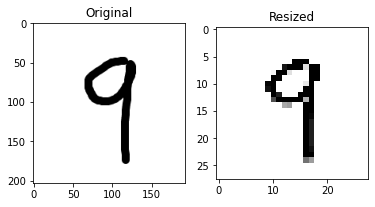

In [95]:
def prepare_new_image(file_path, print_digit=True):
    digit_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    digit_array = cv2.bitwise_not(digit_array)
    digit_array_resized = cv2.resize(digit_array, (28,28))

    digit_reshaped = digit_array_resized.reshape(784)
    digit_normalized = normalize(digit_reshaped)

    if print_digit:
        _, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(digit_array, cmap=plt.cm.binary)
        ax1.set_title('Original')
        ax2.imshow(digit_array_resized, cmap=plt.cm.binary)
        ax2.set_title('Resized')

    return digit_normalized

digit_normalized = prepare_new_image('digits/4.png', print_digit=True)

## Predict

In [96]:
# Prediction using trained Machine Learning Model
predicted_instance_ML = final_ML_model.predict_proba([digit_normalized])
print('ML Model (', type(final_ML_model), '):')
print('Predicted Class:', int(np.argmax(predicted_instance_ML, axis=1)))
print('Probabilities:', predicted_instance_ML)

# Prediction using trained Neural Network
predicted_instance_NN = final_NN_model.predict([digit_normalized.tolist()])
print('Neural Network:')
print('Predicted Class', int(np.argmax(predicted_instance_NN, axis=1)))
print('Probabilities:', predicted_instance_NN)

ML Model ( <class 'sklearn.ensemble._forest.RandomForestClassifier'> ):
Predicted Class: 9
Probabilities: [[0.   0.01 0.03 0.1  0.18 0.06 0.01 0.13 0.05 0.43]]
Neural Network:
Predicted Class 9
Probabilities: [[1.1872774e-09 7.0114657e-14 1.6377905e-10 7.5272000e-10 1.6289973e-06
  1.2691604e-08 4.3697400e-14 9.8856079e-09 3.3139255e-08 9.9999833e-01]]
